# Binary classification problem
In this notebook, we look at a binary classification problem. We are given a sequence of $m$ datapoints $x_1,\ldots,x_m \in \mathbb{R}^n$ and corresponding labels $y_1,\ldots,y_m \in \{-1,1\}$ and want to search for a separating hyperplane. We seek a solution of the convex minimization problem

\begin{equation}\label{eq:lin-soft-margin}
\begin{aligned}
    \min_{\substack{a\in \mathbb{R}^n\\
    b\in\mathbb{R}\\
    s\in\mathbb{R}^{m}
    }
    }\quad & \|a\|^{2}+\gamma\sum_{i=1}^{m}s_{i}\\
    \text{s.t. }\quad & y_{i}\left(a^\top x_{i}-b\right)\geq1-s_{i}\quad\forall i\in\lbrace1,\ldots,m\rbrace,\\
     & s_{i}\geq0\quad\forall i\in\lbrace1,\ldots,m\rbrace.
\end{aligned}
\end{equation}

To ease the visualization, we will use $n=2$ in this example.

We will use some Julia packages.

In [1]:
using Plots # to plot data
using JuMP  # to set up optimization problems
using CSDP  # optimization solver

## Generating the data

First, we generate and plot a random set of labelled data points.

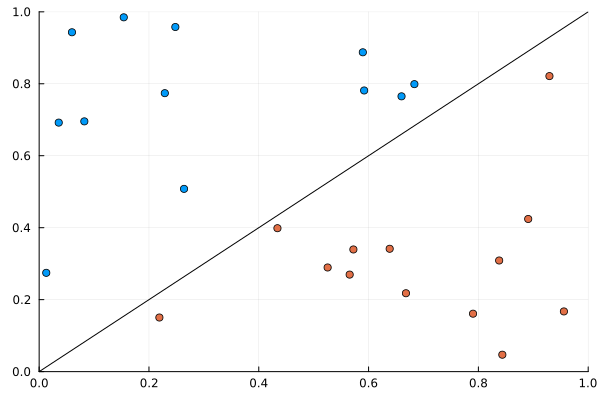

In [2]:
n = 2
m = 25
x = rand(m,n) # each row gives a datapoint
plus = findall(x[:,1].<x[:,2]) # points above the diagonal
minus = findall(x[:,1].>x[:,2]) # points below the diagonal
y = zeros(m,1)
y[minus] .= -1
y[plus] .= 1
scatter(x[plus,1], x[plus,2])
scatter!(x[minus,1], x[minus,2])
plot!([0,1], [0,1], lc = "black")
plot!(legend = false, limits = (0,1))

## Finding the optimal separating hyperplane

Now that we have our labelled data, we set up the optimization problem. For this, we use the JuMP package. We need to create an optimization model, which will contain all optimization variables and constraints.

In [3]:
γ = 100
model = Model()
set_optimizer(model, CSDP.Optimizer)
@variable(model, a[1:n])
@variable(model, b)
@variable(model, s[1:m], lower_bound = 0.0)
@objective(model, Min, γ*sum(s) + a'a)
@constraint(model, y .* (x*a .- b) .>= 1.0)
optimize!(model)

CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.54e-01 Pobj: -7.5538067e-01 Ad: 2.15e-01 Dobj: -1.9238744e+02 
Iter:  2 Ap: 2.16e-01 Pobj: -4.8590732e+00 Ad: 2.44e-01 Dobj: -4.3195522e+02 
Iter:  3 Ap: 5.04e-01 Pobj: -3.8220510e+01 Ad: 1.20e-01 Dobj: -4.8358972e+02 
Iter:  4 Ap: 6.77e-01 Pobj: -1.5504872e+02 Ad: 1.69e-01 Dobj: -4.4069252e+02 
Iter:  5 Ap: 5.43e-01 Pobj: -3.5896831e+02 Ad: 5.42e-01 Dobj: -8.9106129e+02 
Iter:  6 Ap: 2.88e-01 Pobj: -7.4268348e+02 Ad: 4.92e-01 Dobj: -4.6800861e+02 
Iter:  7 Ap: 4.88e-01 Pobj: -1.0430531e+03 Ad: 3.44e-01 Dobj: -2.2968644e+02 
Iter:  8 Ap: 5.54e-01 Pobj: -1.1493046e+03 Ad: 3.79e-01 Dobj:  1.5884804e+00 
Iter:  9 Ap: 1.00e+00 Pobj: -6.4712117e+02 Ad: 8.96e-01 Dobj:  1.2893218e+01 
Iter: 10 Ap: 1.00e+00 Pobj: -4.8569483e+02 Ad: 9.22e-01 Dobj: -8.2475296e+01 
Iter: 11 Ap: 1.00e+00 Pobj: -3.1554087e+02 Ad: 5.91e-01 Dobj: -1.3995540e+02 
Iter: 12 Ap: 1.00e+00 Pobj: -2.5082033e+02 Ad: 8.24e-

Having solved the problem, we look at the solution.

In [4]:
a_opt = value.(a)

2-element Vector{Float64}:
 -9.82763616623086
 11.516996793732787

In [5]:
b_opt = value.(b)

1.3249782981404792

In [6]:
[minimum(value.(s)); maximum(value.(s))]

2-element Vector{Float64}:
 3.637973382535989e-11
 3.637973382535989e-11

We can also plot the optimal hyperplane along with the two "extreme" hyperplanes $H_+ = \{x: a^\top x - b = 1\}$ and $H_- = \{x: a^\top x - b = -1\}$

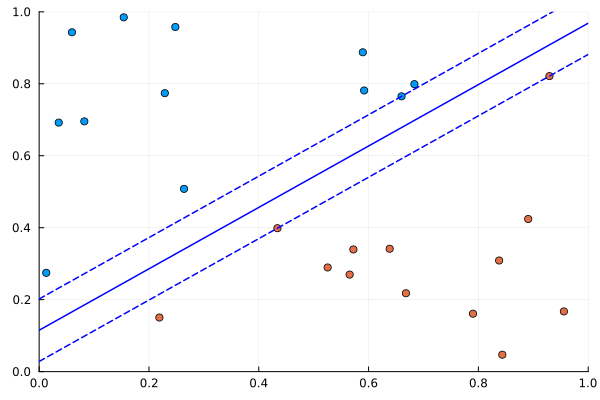

In [7]:
xplot = range(0, 1, length = 100)
yplot = ( b_opt .- a_opt[1] .* xplot ) ./ a_opt[2]
Hpl = ( b_opt .+ 1 .- a_opt[1] .* xplot ) ./ a_opt[2]
Hmn = ( b_opt .- 1 .- a_opt[1] .* xplot ) ./ a_opt[2]
scatter(x[plus,1], x[plus,2])
scatter!(x[minus,1], x[minus,2])
plot!(xplot, yplot, lw=1.5, color="blue")
plot!(xplot, Hpl, lw=1.5, color="blue", ls=:dash)
plot!(xplot, Hmn, lw=1.5, color="blue", ls=:dash)
plot!(legend = false, limits = (0,1))

This concludes the example.